In [1]:
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt


In [2]:
# Function to fetch historical price data from Yahoo Finance
def fetch_stock_data(ticker_symbol, start_date, end_date):
        # ticker_symbol: Ticker symbol of the stock.
        # start_date: Start date in 'YYYY-MM-DD' format.
        # end_date: End date in 'YYYY-MM-DD' format.

    stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
    return stock_data



In [7]:
# Define Parameters
ticker_symbol = 'AAPL'
start_date = dt.datetime.now() - dt.timedelta(days=2*365)
start_date = start_date.strftime('%Y-%m-%d')
end_date = dt.datetime.now() - dt.timedelta(days=1)
end_date = end_date.strftime('%Y-%m-%d')


In [9]:
print(start_date)
print(end_date)

2022-05-10
2024-05-08


In [10]:

# Fetch historical price data
stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)
adj_close_prices = stock_data['Adj Close'].values


[*********************100%%**********************]  1 of 1 completed


In [11]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-10,155.520004,156.740005,152.929993,154.509995,152.988693,115366700
2022-05-11,153.500000,155.449997,145.809998,146.500000,145.057571,142689800
2022-05-12,142.770004,146.199997,138.800003,142.559998,141.156372,182602000
2022-05-13,144.589996,148.100006,143.110001,147.110001,145.661560,113990900
2022-05-16,145.550003,147.520004,144.179993,145.539993,144.107025,86643800
...,...,...,...,...,...,...
2024-05-01,169.580002,172.710007,169.110001,169.300003,169.300003,50383100
2024-05-02,172.509995,173.419998,170.889999,173.029999,173.029999,94214900
2024-05-03,186.649994,187.000000,182.660004,183.380005,183.380005,163224100


In [39]:
stock_data.to_csv("stock_excel3.csv", index=True)

In [14]:
# Calculate daily returns
returns = np.diff(adj_close_prices) / adj_close_prices[:-1]


### Note

1. Each value represents the percentage change in the stock's price from one day to the next.
2. Positive values indicate an increase in prices, while negative values indicate a decrease.

#### For example:

1. The first value, **1.61118265e-02**, represents a **1.61%** increase in the stock's price from the previous day.
1. The second value, **-5.18412338e-02**, represents a **5.18%** decrease in the stock's price from the previous day.

In [12]:
returns

array([ 1.61118265e-02, -5.18412338e-02, -2.68942529e-02,  3.19165151e-02,
       -1.06721338e-02,  2.54225901e-02, -5.64192850e-02, -2.46414007e-02,
        1.74749794e-03,  4.01192027e-02, -1.92163583e-02,  1.14019865e-03,
        2.31994549e-02,  4.07567425e-02, -5.34620633e-03, -8.73442291e-04,
        1.68113642e-02, -3.85556488e-02,  5.22747105e-03,  1.75859640e-02,
       -5.04336780e-03, -3.59556944e-02, -3.86286149e-02, -3.82847967e-02,
        6.67263316e-03,  2.01113328e-02, -3.96514580e-02,  1.15333647e-02,
        3.27604719e-02, -3.82694075e-03,  2.15735876e-02,  2.45174056e-02,
        0.00000000e+00, -2.97897518e-02,  1.30238178e-02, -1.80278629e-02,
        1.61645923e-02,  1.89304369e-02,  9.60708074e-03,  2.39996343e-02,
        4.71444998e-03, -1.47575882e-02,  6.83362406e-03, -2.53661847e-03,
        2.04823580e-02,  1.14502030e-02, -2.06432417e-02,  2.67218010e-02,
        1.35100270e-02,  1.50941337e-02, -8.11078433e-03, -7.39813020e-03,
       -8.82656481e-03,  

In [15]:

# Generate Random Returns
num_simulations = 1000
mean_return = np.mean(returns)
std_dev = np.std(returns)
next_day_returns = np.random.normal(mean_return, std_dev, num_simulations)


In [40]:
print(mean_return)
print(std_dev)

0.0005011368853496625
0.017303478387676662


### Note

 I have generated random returns for the next day based on the mean and standard deviation of the observed daily returns.

In [14]:
next_day_returns

array([-1.68810104e-03, -1.85929607e-03, -1.96461749e-02,  1.14669835e-02,
       -1.61730725e-02, -2.74740095e-02,  9.66632476e-03, -1.44967333e-02,
        1.71286315e-02, -4.05052882e-04, -9.73433003e-03,  1.01550669e-02,
        7.83835026e-03, -1.23659983e-02,  1.15773368e-02,  1.09337766e-02,
       -6.33405165e-03,  3.92768814e-03,  9.19805642e-03,  3.57963061e-02,
        2.76546595e-03, -1.22295045e-02,  2.68694797e-02, -3.78190231e-02,
        1.25819506e-02,  2.22403125e-03,  1.25917554e-02,  1.29024886e-02,
       -1.51803837e-03,  3.62980023e-03, -1.64406832e-02, -1.76329124e-02,
       -1.34584479e-02, -2.00059683e-02,  9.24920208e-03,  2.44680381e-02,
        1.61255606e-02,  2.67959712e-02, -3.05306043e-02,  2.17518613e-02,
        8.94313031e-03,  1.31657920e-02, -6.46429606e-03, -3.34586786e-03,
       -6.09145200e-03,  5.92000796e-03, -3.38477499e-03,  8.08739354e-03,
        9.48743160e-03,  2.66250333e-02, -8.94386434e-03, -3.19894261e-02,
        7.53497925e-03,  

In [16]:

# Calculate Future Prices
yesterday_value = adj_close_prices[-1]
simulated_values = yesterday_value * (1 + next_day_returns)


### Note

 Each value in **simulated_values** represents the predicted price of the stock for the next day under one of the simulated scenarios.

In [20]:
simulated_values

array([182.95896452, 188.51747672, 183.5530208 , 184.45037578,
       187.11732174, 188.08503561, 179.69387106, 181.60909123,
       179.85082034, 184.18347506, 184.13109534, 181.45362459,
       185.77103266, 185.23960228, 180.01837535, 181.68924516,
       185.67276541, 182.97974635, 184.94244005, 181.70024671,
       175.48137188, 180.48264864, 182.39328262, 180.54711685,
       183.71590906, 184.25331536, 180.96252554, 181.62746044,
       181.63538579, 184.85761226, 180.31705092, 182.6655264 ,
       180.55833572, 184.42781641, 180.00760577, 185.41815707,
       182.44377604, 181.03586022, 179.97135737, 186.00905969,
       183.264633  , 184.27089895, 185.01046008, 182.50299064,
       183.65413592, 182.50649332, 185.94651219, 182.7128571 ,
       187.25864323, 175.8747299 , 178.26851214, 181.59468696,
       185.50968438, 189.5947619 , 183.38976362, 180.89498985,
       180.72978531, 179.37274177, 180.06363952, 180.52900983,
       183.9923096 , 185.59589987, 186.30476108, 183.42

In [21]:

# Analyze Results
mean_simulated_value = np.mean(simulated_values)
std_dev_simulated_value = np.std(simulated_values)


In [35]:
print("Mean: ${:.4f}".format(mean_simulated_value))
print("St Deviation: {:.4f}".format(std_dev_simulated_value))

Mean: $182.4764
St Deviation: 3.1192


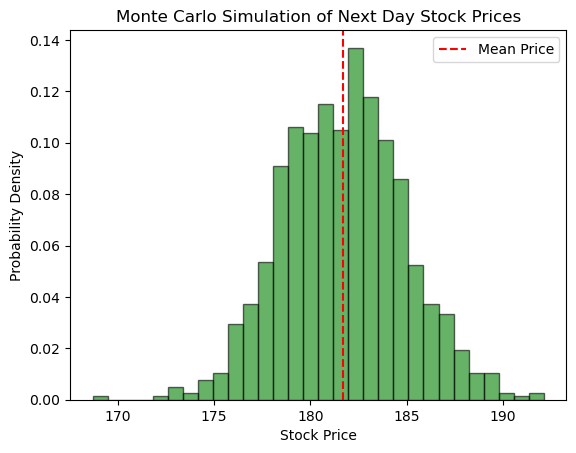

In [17]:

# Visualize Results
plt.hist(simulated_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.xlabel('Stock Price')
plt.ylabel('Probability Density')
plt.title('Monte Carlo Simulation of Next Day Stock Prices')
plt.axvline(x=mean_simulated_value, color='r', linestyle='--', label='Mean Price')
plt.legend()
plt.show()


### Note

1. The higher the bar, the greater the probability density for this particular stock price range.
3. The distribution of simulated stock prices appears to be approximately normal. The distribution is centered around the mean value, with most of the simulated prices clustered around the mean, and fewer simulated prices falling in the tails of the distribution. This clearly gives a better confinence in the results since they are not  spreaad.

In [18]:

# Risk Analysis
threshold_return = yesterday_value * 0.95  # 5% decrease from yesterday's value
prob_below_threshold = np.mean(simulated_values < threshold_return)
print("Probability of stock price falling below {:.2f} (5% decrease): {:.2f}%".format(threshold_return, prob_below_threshold * 100))


Probability of stock price falling below 172.62 (5% decrease): 0.30%


### Note

Above am conducting a risk analysis by calculating the probability of the next day's stock price falling below a certain threshold which is  a 5% decrease from yesterday's closing price.